In [31]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('exp[1-2]-10-100-20.mat')
experimentProposals = mat['experimentBestProposals'][0]
experimentFits = mat['experimentBestFits'][0]
experimentProfiles = mat['experimentBestShapes'][0]

dataset = []

for iExperiment in range(len(experimentProposals)):
    nValue = []
    fit = []
    profileABH = []
    runout = experimentProposals[iExperiment][0]
    for iGen in range(len(runout)):
        experiment = runout[iGen][0]
        nValue.append(experiment[1][0][0])
        fit.append(experimentFits[iExperiment][0][iGen][0][0])
        profileABH.append(experimentProfiles[iExperiment][0][iGen][0])
    experiments = {
        'nValues': nValue,
        'fit': fit,
        'profileABH':profileABH
    }
    dataset.append(experiments)

expNMean = []
for exp in dataset:
    expNMean.append(exp['nValues'][100])
print(np.mean(expNMean, axis=0))
print(np.std(expNMean, axis=0))

1.8542898660213096
0.10469958595868605


In [32]:
import scipy.io

mat = scipy.io.loadmat('exp[1-2]-10-100-10.mat')
experimentProposals = mat['experimentBestProposals'][0]
experimentFits = mat['experimentBestFits'][0]
experimentProfiles = mat['experimentBestShapes'][0]

dataset = []

for iExperiment in range(len(experimentProposals)):
    nValue = []
    fit = []
    profileABH = []
    runout = experimentProposals[iExperiment][0]
    for iGen in range(len(runout)):
        experiment = runout[iGen][0]
        nValue.append(experiment[1][0][0])
        fit.append(experimentFits[iExperiment][0][iGen][0][0])
        profileABH.append(experimentProfiles[iExperiment][0][iGen][0])
    experiments = {
        'nValues': nValue,
        'fit': fit,
        'profileABH':profileABH
    }
    dataset.append(experiments)

expNMean = []
for exp in dataset:
    expNMean.append(exp['nValues'][100])
print(np.mean(expNMean, axis=0))
print(np.std(expNMean, axis=0))

1.8542898660213096
0.10469958595868605


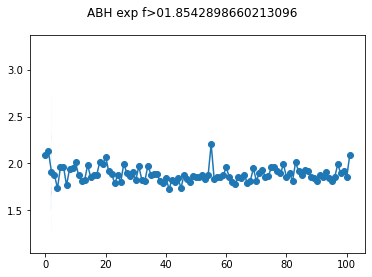

In [59]:

expNValues = []
for iRadius in range(len(dataset[0]['nValues'])):
    generation = []
    for experiment in dataset:
        generation.append(experiment['nValues'][iRadius])
    expNValues.append(generation)
    
nMean = []
nStdUp = []
nStdDown = []

for exp in expNValues:
    nMean.append(np.mean(exp, axis=0))
    nStdUp.append(np.mean(exp, axis=0)+np.std(exp, axis=0))
    nStdDown.append(np.mean(exp, axis=0)-np.std(exp, axis=0))

fig, (ax) = plt.subplots(1,1)
fig.suptitle('ABH exp f>0'+str(np.mean(expNMean)))
ax.fill_between(nMean,nStdUp,nStdDown , alpha=0.2)
ax.plot(nMean,'o-')


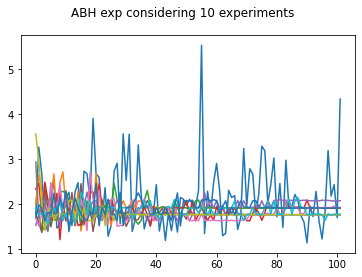

In [57]:
fig, (ax) = plt.subplots(1,1)
fig.suptitle('ABH exp considering f>0 - 10 exp')
for data in dataset:
    ax.plot(data['nValues'],'-')


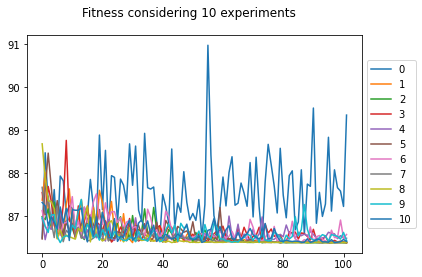

In [55]:
fig, (ax) = plt.subplots(1,1)
fig.suptitle('Fitness considering f>0 - 10 exp')
current = 0
for data in dataset:
    ax.plot(data['fit'],'-')
plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))


/var/folders/vb/p27_cy8s2lz6fxhsnlp33qgc0000gn/T/ipykernel_36482/3355463558.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


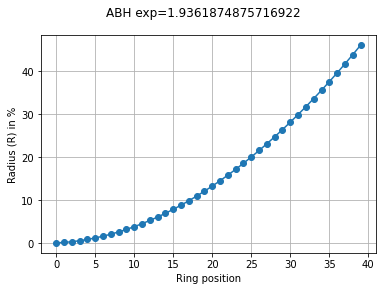

In [30]:
datasetId = 9
genId = 20
profileInPercent = dataset[datasetId]['profileABH'][genId]
expN = dataset[datasetId]['nValues'][genId]

fig, (ax1) = plt.subplots(1,1)
fig.suptitle('ABH exp='+str(expN))
ax1.plot(profileInPercent,'o-')

ax1.set(xlabel='Ring position', ylabel='Radius (R) in %')
ax1.grid()
fig.show()
